In [1]:
import pandas as pd
import numpy as np

# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) 

In [2]:
ruta_archivo_csv = 'Files/data_v1.csv'

data = pd.read_csv(ruta_archivo_csv, index_col=0)

data

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,NaN,684.0,NaN,6,3,NaN,162.0,1.0,H,51.0,3.0,5.0,research director,3.0,NaN,19537.0,6462,7,no,13.0,3.0,3.0,NaN,0.0,NaN,5.0,3.0,20.0,NaN,15,15,1972,yes
1,52,No,NaN,699.0,NaN,1,4,life sciences,259.0,3.0,H,65.0,2.0,5.0,manager,3.0,NaN,19999.0,5678,0,NaN,14.0,3.0,1.0,NaN,1.0,34.0,5.0,3.0,33.0,NaN,11,9,1971,yes
2,42,No,travel_rarely,532.0,research & development,4,2,technical degree,319.0,3.0,H,58.0,3.0,5.0,manager,4.0,married,19232.0,4933,1,no,11.0,3.0,4.0,NaN,0.0,22.0,3.0,NaN,22.0,NaN,11,15,1981,yes
3,47,No,travel_rarely,359.0,NaN,2,4,medical,NaN,1.0,M,82.0,3.0,4.0,research director,3.0,married,17169.0,26703,3,NaN,19.0,3.0,2.0,NaN,2.0,NaN,2.0,NaN,20.0,NaN,5,6,1976,no
4,46,No,NaN,1319.0,NaN,3,3,technical degree,NaN,1.0,M,45.0,4.0,4.0,sales executive,1.0,divorced,NaN,7739,2,no,12.0,3.0,4.0,NaN,1.0,NaN,5.0,3.0,19.0,NaN,2,8,1977,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,Yes,travel_rarely,530.0,NaN,3,1,life sciences,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,married,10325.0,5518,1,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,7,1987,no
1610,45,No,non-travel,805.0,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4447.0,23163,1,NaN,12.0,3.0,2.0,NaN,0.0,NaN,5.0,2.0,9.0,NaN,0,8,1978,yes
1611,39,No,travel_rarely,903.0,NaN,13,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,2560,0,no,18.0,3.0,4.0,NaN,0.0,9.0,3.0,3.0,8.0,NaN,0,7,1984,yes
1612,36,No,non-travel,1229.0,NaN,8,4,technical degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,divorced,NaN,25952,4,no,13.0,NaN,4.0,NaN,2.0,12.0,3.0,3.0,7.0,NaN,0,7,1987,yes


In [3]:
data_copia = data.copy()
data_copia.head(1)

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,NaN,684.0,NaN,6,3,NaN,162.0,1.0,H,51.0,3.0,5.0,research director,3.0,NaN,19537.0,6462,7,no,13.0,3.0,3.0,NaN,0.0,NaN,5.0,3.0,20.0,NaN,15,15,1972,yes


**Gestión de nulos categóricos**   

- Moda: Businesstravel, Overtime   
- 'Unknown': Educationfield, Gender, Maritalstatus   
- A revisar: Department, Jobrole

In [4]:
columnas_moda = ['Businesstravel', 'Overtime']
columnas_desc = ['Educationfield', 'Gender', 'Maritalstatus']

In [5]:
#Moda

for col in columnas_moda:
    moda = data_copia[col].mode()[0]
    data_copia[col] = data_copia[col].fillna(moda)

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

data_copia[columnas_moda].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


Businesstravel    0
Overtime          0
dtype: int64

In [6]:
for col in columnas_desc:
    data_copia[col] = data_copia[col].fillna("unknown")

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

data_copia[columnas_desc].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


Educationfield    0
Gender            0
Maritalstatus     0
dtype: int64

**Gestión de nulos numéricos**   
- Mediana: EnvironmentSatisfaction, HourlyRate, JobInvolvement, JobSatisfaction, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TrainingTimesLastYear, WorkLifeBalance   
- Revisar: 'Dailyrate', 'EmployeeNumber', 'Joblevel', 'Totalworkingyears', 'Yearsatcompany'   
- Eliminar: 

In [7]:
columnas_mediana = ['Environmentsatisfaction', 'Hourlyrate',
    'Jobinvolvement', 'Jobsatisfaction', 'Performancerating', 'Relationshipsatisfaction',
    'Stockoptionlevel', 'Trainingtimeslastyear',
    'Worklifebalance']

for col in columnas_mediana:
    mediana = data_copia[col].median()
    data_copia[col] = data_copia[col].fillna(mediana)

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

data_copia[columnas_mediana].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


Environmentsatisfaction     0
Hourlyrate                  0
Jobinvolvement              0
Jobsatisfaction             0
Performancerating           0
Relationshipsatisfaction    0
Stockoptionlevel            0
Trainingtimeslastyear       0
Worklifebalance             0
dtype: int64

In [8]:
data_copia[['Dailyrate', 'Joblevel', 'Totalworkingyears', 'Yearsatcompany']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Dailyrate,1484.0,803.570081,402.347571,103.0,469.75,800.5,1157.0,1499.0
Joblevel,1586.0,2.064943,1.102424,1.0,1.00,2.0,3.0,5.0
Totalworkingyears,1071.0,11.265173,7.664379,0.0,6.00,10.0,15.0,40.0
Yearsatcompany,1586.0,7.059899,6.027870,0.0,3.00,5.0,9.0,40.0


In [9]:
data_copia.head()

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,travel_rarely,684.0,NaN,6,3,unknown,162.0,1.0,H,51.0,3.0,5.0,research director,3.0,unknown,19537.0,6462,7,no,13.0,3.0,3.0,NaN,0.0,NaN,5.0,3.0,20.0,NaN,15,15,1972,yes
1,52,No,travel_rarely,699.0,NaN,1,4,life sciences,259.0,3.0,H,65.0,2.0,5.0,manager,3.0,unknown,19999.0,5678,0,no,14.0,3.0,1.0,NaN,1.0,34.0,5.0,3.0,33.0,NaN,11,9,1971,yes
2,42,No,travel_rarely,532.0,research & development,4,2,technical degree,319.0,3.0,H,58.0,3.0,5.0,manager,4.0,married,19232.0,4933,1,no,11.0,3.0,4.0,NaN,0.0,22.0,3.0,3.0,22.0,NaN,11,15,1981,yes
3,47,No,travel_rarely,359.0,NaN,2,4,medical,NaN,1.0,M,82.0,3.0,4.0,research director,3.0,married,17169.0,26703,3,no,19.0,3.0,2.0,NaN,2.0,NaN,2.0,3.0,20.0,NaN,5,6,1976,no
4,46,No,travel_rarely,1319.0,NaN,3,3,technical degree,NaN,1.0,M,45.0,4.0,4.0,sales executive,1.0,divorced,NaN,7739,2,no,12.0,3.0,4.0,NaN,1.0,NaN,5.0,3.0,19.0,NaN,2,8,1977,no


In [10]:
data_copia.isnull().sum()

Age                            0
Attrition                      0
Businesstravel                 0
Dailyrate                    123
Department                  1305
Distancefromhome               0
Education                      0
Educationfield                 0
Employeenumber               440
Environmentsatisfaction        0
Gender                         0
Hourlyrate                     0
Jobinvolvement                 0
Joblevel                      21
Jobrole                       21
Jobsatisfaction                0
Maritalstatus                  0
Monthlyincome                840
Monthlyrate                    0
Numcompaniesworked             0
Overtime                       0
Percentsalaryhike              0
Performancerating              0
Relationshipsatisfaction       0
Standardhours               1190
Stockoptionlevel               0
Totalworkingyears            536
Trainingtimeslastyear          0
Worklifebalance                0
Yearsatcompany                21
Yearsincur

In [11]:
df_nulos = pd.DataFrame((data_copia.isnull().sum() / data_copia.shape[0]) * 100, columns = ["%_nulos"])

df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Dailyrate,7.654014
Department,81.207218
Employeenumber,27.380212
Joblevel,1.306783
Jobrole,1.306783
Monthlyincome,52.271313
Standardhours,74.051027
Totalworkingyears,33.354076
Yearsatcompany,1.306783
Yearsincurrentrole,97.946484


------

CATEGÓRICAS = Department, Jobrole   
NUMÉRICAS = 'Dailyrate', 'Joblevel', 'Totalworkingyears', 'Yearsatcompany'

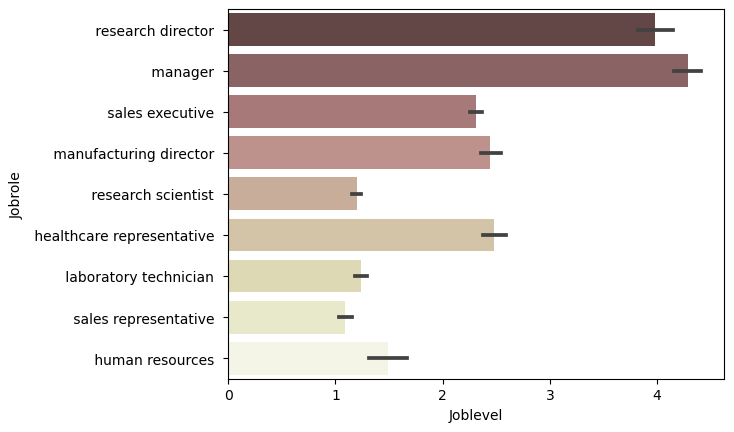

In [12]:
sns.barplot(y = "Jobrole", 
            x = "Joblevel", 
            data = data_copia, 
            palette = "pink");

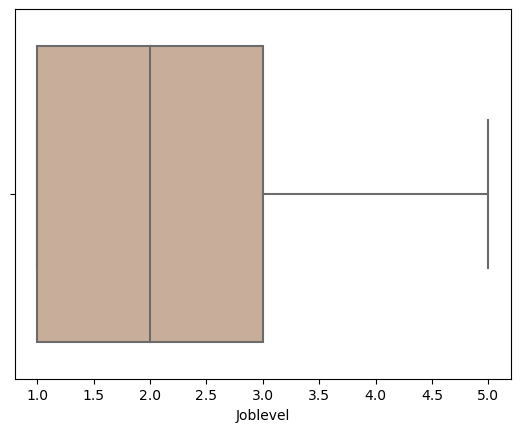

In [13]:
sns.boxplot(x = "Joblevel", 
            data = data_copia,
            palette= "pink");

In [14]:
data_copia["Joblevel"].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [15]:
data_copia[data_copia["Joblevel"] == 5][['Joblevel', 'Jobrole']]

,Joblevel,Jobrole
0,5.0,research director
1,5.0,manager
2,5.0,manager
9,5.0,research director
10,5.0,research director
...,...,...
1485,5.0,research director
1493,5.0,manager
1508,5.0,research director
1525,5.0,research director


In [16]:
data_copia[["Joblevel", "Jobrole", "Department"]].sample(10)

,Joblevel,Jobrole,Department
1534,2.0,laboratory technician,NaN
1579,1.0,research scientist,NaN
1428,2.0,sales executive,sales
1121,2.0,sales executive,NaN
1028,2.0,sales executive,NaN
1540,2.0,sales executive,NaN
866,2.0,healthcare representative,NaN
784,2.0,healthcare representative,NaN
594,1.0,laboratory technician,NaN
92,2.0,manufacturing director,NaN


**ELIMINAR LAS FILAS CON LOS NULOS: 1593-1613**

In [17]:
data_copia.reset_index(drop=True, inplace=True)

In [18]:
data_copia.iloc[1586:1607,:]

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
1586,36,No,non-travel,1434.0,NaN,8,4,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,single,7587.0,14229,1,no,15.0,3.0,2.0,80.0,0.0,10.0,1.0,3.0,10.0,NaN,0,9,1987,yes
1587,29,No,travel_rarely,657.0,NaN,27,3,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,married,4335.0,25549,4,no,12.0,3.0,1.0,NaN,1.0,11.0,3.0,2.0,8.0,NaN,1,1,1994,yes
1588,38,No,travel_rarely,240.0,NaN,2,4,life sciences,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,single,5980.0,26085,6,no,12.0,3.0,4.0,NaN,0.0,17.0,2.0,3.0,15.0,NaN,4,12,1985,no
1589,40,No,travel_rarely,791.0,NaN,2,2,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,4244.0,9931,1,no,24.0,4.0,4.0,NaN,1.0,8.0,2.0,3.0,8.0,NaN,3,7,1983,yes
1590,42,No,travel_frequently,570.0,NaN,8,3,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,NaN,16225,1,no,13.0,3.0,3.0,NaN,1.0,NaN,3.0,3.0,NaN,NaN,14,9,1981,yes
1591,36,No,travel_rarely,676.0,NaN,1,3,other,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,5228.0,23361,0,no,15.0,3.0,1.0,NaN,1.0,NaN,2.0,3.0,9.0,NaN,0,5,1987,yes
1592,29,No,travel_rarely,NaN,NaN,23,2,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,married,2700.0,23779,1,no,24.0,4.0,3.0,NaN,1.0,10.0,3.0,3.0,10.0,NaN,0,7,1994,no
1593,55,Yes,travel_rarely,436.0,NaN,2,1,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,single,NaN,21519,4,no,16.0,3.0,3.0,80.0,0.0,NaN,3.0,2.0,9.0,NaN,7,3,1968,yes
1594,28,No,travel_rarely,760.0,sales,43,4,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,NaN,3698,1,no,20.0,4.0,1.0,NaN,0.0,8.0,2.0,3.0,8.0,NaN,7,5,1995,no
1595,26,Yes,travel_rarely,NaN,NaN,5,2,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,married,2366.0,20898,1,no,14.0,3.0,1.0,NaN,1.0,8.0,2.0,3.0,8.0,NaN,1,7,1997,yes


In [19]:
data_eliminado = data_copia.drop(data_copia.index[1586:1607])

In [20]:
data_eliminado

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,travel_rarely,684.0,NaN,6,3,unknown,162.0,1.0,H,51.0,3.0,5.0,research director,3.0,unknown,19537.0,6462,7,no,13.0,3.0,3.0,NaN,0.0,NaN,5.0,3.0,20.0,NaN,15,15,1972,yes
1,52,No,travel_rarely,699.0,NaN,1,4,life sciences,259.0,3.0,H,65.0,2.0,5.0,manager,3.0,unknown,19999.0,5678,0,no,14.0,3.0,1.0,NaN,1.0,34.0,5.0,3.0,33.0,NaN,11,9,1971,yes
2,42,No,travel_rarely,532.0,research & development,4,2,technical degree,319.0,3.0,H,58.0,3.0,5.0,manager,4.0,married,19232.0,4933,1,no,11.0,3.0,4.0,NaN,0.0,22.0,3.0,3.0,22.0,NaN,11,15,1981,yes
3,47,No,travel_rarely,359.0,NaN,2,4,medical,NaN,1.0,M,82.0,3.0,4.0,research director,3.0,married,17169.0,26703,3,no,19.0,3.0,2.0,NaN,2.0,NaN,2.0,3.0,20.0,NaN,5,6,1976,no
4,46,No,travel_rarely,1319.0,NaN,3,3,technical degree,NaN,1.0,M,45.0,4.0,4.0,sales executive,1.0,divorced,NaN,7739,2,no,12.0,3.0,4.0,NaN,1.0,NaN,5.0,3.0,19.0,NaN,2,8,1977,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,28,Yes,travel_rarely,654.0,research & development,1,2,unknown,966.0,3.0,M,93.0,3.0,2.0,manufacturing director,1.0,unknown,2216.0,3872,7,yes,13.0,3.0,4.0,80.0,0.0,10.0,4.0,3.0,7.0,NaN,3,7,1995,yes
1582,36,No,travel_rarely,427.0,research & development,8,3,unknown,972.0,3.0,H,57.0,3.0,2.0,laboratory technician,2.0,married,11713.0,20335,9,no,14.0,3.0,1.0,80.0,1.0,10.0,2.0,3.0,8.0,NaN,0,5,1987,no
1583,30,No,travel_rarely,501.0,NaN,35,5,marketing,NaN,1.0,H,41.0,4.0,3.0,sales executive,3.0,divorced,5304.0,25275,7,no,23.0,3.0,4.0,80.0,1.0,10.0,2.0,2.0,8.0,NaN,7,7,1993,no
1584,56,No,travel_rarely,NaN,NaN,9,3,unknown,990.0,1.0,H,84.0,3.0,2.0,sales executive,4.0,married,11103.0,20420,7,no,11.0,3.0,3.0,NaN,0.0,30.0,1.0,2.0,10.0,NaN,1,1,1967,yes


In [21]:
nulos = data_eliminado[data_eliminado[["Joblevel", "Jobrole"]].isnull().any(axis=1)]
nulos

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework


In [22]:
data_eliminado.to_csv("Files/data_v2.csv")

In [23]:
nulos = data_copia[data_copia[["Joblevel", "Jobrole"]].isnull().any(axis=1)]
nulos

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
1586,36,No,non-travel,1434.0,NaN,8,4,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,single,7587.0,14229,1,no,15.0,3.0,2.0,80.0,0.0,10.0,1.0,3.0,10.0,NaN,0,9,1987,yes
1587,29,No,travel_rarely,657.0,NaN,27,3,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,married,4335.0,25549,4,no,12.0,3.0,1.0,NaN,1.0,11.0,3.0,2.0,8.0,NaN,1,1,1994,yes
1588,38,No,travel_rarely,240.0,NaN,2,4,life sciences,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,single,5980.0,26085,6,no,12.0,3.0,4.0,NaN,0.0,17.0,2.0,3.0,15.0,NaN,4,12,1985,no
1589,40,No,travel_rarely,791.0,NaN,2,2,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,4244.0,9931,1,no,24.0,4.0,4.0,NaN,1.0,8.0,2.0,3.0,8.0,NaN,3,7,1983,yes
1590,42,No,travel_frequently,570.0,NaN,8,3,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,NaN,16225,1,no,13.0,3.0,3.0,NaN,1.0,NaN,3.0,3.0,NaN,NaN,14,9,1981,yes
1591,36,No,travel_rarely,676.0,NaN,1,3,other,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,5228.0,23361,0,no,15.0,3.0,1.0,NaN,1.0,NaN,2.0,3.0,9.0,NaN,0,5,1987,yes
1592,29,No,travel_rarely,NaN,NaN,23,2,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,married,2700.0,23779,1,no,24.0,4.0,3.0,NaN,1.0,10.0,3.0,3.0,10.0,NaN,0,7,1994,no
1593,55,Yes,travel_rarely,436.0,NaN,2,1,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,single,NaN,21519,4,no,16.0,3.0,3.0,80.0,0.0,NaN,3.0,2.0,9.0,NaN,7,3,1968,yes
1594,28,No,travel_rarely,760.0,sales,43,4,unknown,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,unknown,NaN,3698,1,no,20.0,4.0,1.0,NaN,0.0,8.0,2.0,3.0,8.0,NaN,7,5,1995,no
1595,26,Yes,travel_rarely,NaN,NaN,5,2,medical,NaN,3.0,unknown,64.0,3.0,NaN,NaN,3.0,married,2366.0,20898,1,no,14.0,3.0,1.0,NaN,1.0,8.0,2.0,3.0,8.0,NaN,1,7,1997,yes


In [24]:
(data_copia["Joblevel"].value_counts() / data_copia.shape[0])*100

2.0    36.341008
1.0    36.092097
3.0    14.623522
4.0     7.031736
5.0     4.604854
Name: Joblevel, dtype: float64

In [25]:
porcentaje_nulos_por_fila = pd.DataFrame((data_copia.isnull().sum(axis=1) / len(data_copia.columns)) * 100, columns = ["%_nulos"])
porcentaje_nulos_por_fila[porcentaje_nulos_por_fila["%_nulos"] >= 20]

,%_nulos
183,20.000000
1509,20.000000
1590,25.714286
1591,20.000000
1592,20.000000
1593,20.000000
1595,20.000000
1600,20.000000
1602,22.857143
1603,20.000000


In [26]:
data = pd.read_csv("Files/data_v2.csv", index_col=0)

data

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,travel_rarely,684.0,NaN,6,3,unknown,162.0,1.0,H,51.0,3.0,5.0,research director,3.0,unknown,19537.0,6462,7,no,13.0,3.0,3.0,NaN,0.0,NaN,5.0,3.0,20.0,NaN,15,15,1972,yes
1,52,No,travel_rarely,699.0,NaN,1,4,life sciences,259.0,3.0,H,65.0,2.0,5.0,manager,3.0,unknown,19999.0,5678,0,no,14.0,3.0,1.0,NaN,1.0,34.0,5.0,3.0,33.0,NaN,11,9,1971,yes
2,42,No,travel_rarely,532.0,research & development,4,2,technical degree,319.0,3.0,H,58.0,3.0,5.0,manager,4.0,married,19232.0,4933,1,no,11.0,3.0,4.0,NaN,0.0,22.0,3.0,3.0,22.0,NaN,11,15,1981,yes
3,47,No,travel_rarely,359.0,NaN,2,4,medical,NaN,1.0,M,82.0,3.0,4.0,research director,3.0,married,17169.0,26703,3,no,19.0,3.0,2.0,NaN,2.0,NaN,2.0,3.0,20.0,NaN,5,6,1976,no
4,46,No,travel_rarely,1319.0,NaN,3,3,technical degree,NaN,1.0,M,45.0,4.0,4.0,sales executive,1.0,divorced,NaN,7739,2,no,12.0,3.0,4.0,NaN,1.0,NaN,5.0,3.0,19.0,NaN,2,8,1977,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,28,Yes,travel_rarely,654.0,research & development,1,2,unknown,966.0,3.0,M,93.0,3.0,2.0,manufacturing director,1.0,unknown,2216.0,3872,7,yes,13.0,3.0,4.0,80.0,0.0,10.0,4.0,3.0,7.0,NaN,3,7,1995,yes
1582,36,No,travel_rarely,427.0,research & development,8,3,unknown,972.0,3.0,H,57.0,3.0,2.0,laboratory technician,2.0,married,11713.0,20335,9,no,14.0,3.0,1.0,80.0,1.0,10.0,2.0,3.0,8.0,NaN,0,5,1987,no
1583,30,No,travel_rarely,501.0,NaN,35,5,marketing,NaN,1.0,H,41.0,4.0,3.0,sales executive,3.0,divorced,5304.0,25275,7,no,23.0,3.0,4.0,80.0,1.0,10.0,2.0,2.0,8.0,NaN,7,7,1993,no
1584,56,No,travel_rarely,NaN,NaN,9,3,unknown,990.0,1.0,H,84.0,3.0,2.0,sales executive,4.0,married,11103.0,20420,7,no,11.0,3.0,3.0,NaN,0.0,30.0,1.0,2.0,10.0,NaN,1,1,1967,yes


# Cambiar nulos columnas categóricas por "unknow"

In [27]:
data.head(5)

,Age,Attrition,Businesstravel,Dailyrate,Department,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyincome,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Standardhours,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,travel_rarely,684.0,NaN,6,3,unknown,162.0,1.0,H,51.0,3.0,5.0,research director,3.0,unknown,19537.0,6462,7,no,13.0,3.0,3.0,NaN,0.0,NaN,5.0,3.0,20.0,NaN,15,15,1972,yes
1,52,No,travel_rarely,699.0,NaN,1,4,life sciences,259.0,3.0,H,65.0,2.0,5.0,manager,3.0,unknown,19999.0,5678,0,no,14.0,3.0,1.0,NaN,1.0,34.0,5.0,3.0,33.0,NaN,11,9,1971,yes
2,42,No,travel_rarely,532.0,research & development,4,2,technical degree,319.0,3.0,H,58.0,3.0,5.0,manager,4.0,married,19232.0,4933,1,no,11.0,3.0,4.0,NaN,0.0,22.0,3.0,3.0,22.0,NaN,11,15,1981,yes
3,47,No,travel_rarely,359.0,NaN,2,4,medical,NaN,1.0,M,82.0,3.0,4.0,research director,3.0,married,17169.0,26703,3,no,19.0,3.0,2.0,NaN,2.0,NaN,2.0,3.0,20.0,NaN,5,6,1976,no
4,46,No,travel_rarely,1319.0,NaN,3,3,technical degree,NaN,1.0,M,45.0,4.0,4.0,sales executive,1.0,divorced,NaN,7739,2,no,12.0,3.0,4.0,NaN,1.0,NaN,5.0,3.0,19.0,NaN,2,8,1977,no


In [28]:
categoricas = ['Businesstravel','Overtime','Educationfield','Maritalstatus']

In [29]:
for col in categoricas:
    data[col] = data[col].fillna("unknown")

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

data[categoricas].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


Businesstravel    0
Overtime          0
Educationfield    0
Maritalstatus     0
dtype: int64

# Cambiar columnas numéricas por la mediana 

In [30]:
data[['Environmentsatisfaction', 'Hourlyrate',
    'Jobinvolvement', 'Jobsatisfaction', 'Performancerating', 'Relationshipsatisfaction',
    'Stockoptionlevel', 'Trainingtimeslastyear',
    'Worklifebalance']].describe().transpose()[['mean', '50%']]

,mean,50%
Environmentsatisfaction,2.691047,3.0
Hourlyrate,62.508827,64.0
Jobinvolvement,2.738966,3.0
Jobsatisfaction,2.732661,3.0
Performancerating,3.133039,3.0
Relationshipsatisfaction,2.713745,3.0
Stockoptionlevel,0.794451,1.0
Trainingtimeslastyear,2.807692,3.0
Worklifebalance,2.779950,3.0


In [31]:
columnas_mediana = ['Environmentsatisfaction',
    'Jobinvolvement', 'Jobsatisfaction', 'Performancerating', 'Relationshipsatisfaction',
    'Stockoptionlevel', 'Trainingtimeslastyear','Worklifebalance', 'Dailyrate', 'Yearsatcompany']

for col in columnas_mediana:
    mediana = data[col].median()
    data[col] = data[col].fillna(mediana)

print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")

data[columnas_mediana].isnull().sum()

Después del reemplazo usando 'fillna' quedan los siguientes nulos


Environmentsatisfaction     0
Jobinvolvement              0
Jobsatisfaction             0
Performancerating           0
Relationshipsatisfaction    0
Stockoptionlevel            0
Trainingtimeslastyear       0
Worklifebalance             0
Dailyrate                   0
Yearsatcompany              0
dtype: int64

# Elimnar columnas con nulos superiores al 40%

In [32]:
df_nulos = pd.DataFrame((data.isnull().sum() / data.shape[0]) * 100, columns = ["%_nulos"])

df_nulos[df_nulos["%_nulos"] > 40]

,%_nulos
Department,81.147541
Monthlyincome,52.459016
Standardhours,74.022699
Yearsincurrentrole,97.919294


In [33]:
data_v2 = data.drop(['Department', 'Monthlyincome', 'Standardhours', 'Yearsincurrentrole','Totalworkingyears'], axis=1)

In [34]:
data_v2

,Age,Attrition,Businesstravel,Dailyrate,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework
0,51,No,travel_rarely,684.0,6,3,unknown,162.0,1.0,H,51.0,3.0,5.0,research director,3.0,unknown,6462,7,no,13.0,3.0,3.0,0.0,5.0,3.0,20.0,15,15,1972,yes
1,52,No,travel_rarely,699.0,1,4,life sciences,259.0,3.0,H,65.0,2.0,5.0,manager,3.0,unknown,5678,0,no,14.0,3.0,1.0,1.0,5.0,3.0,33.0,11,9,1971,yes
2,42,No,travel_rarely,532.0,4,2,technical degree,319.0,3.0,H,58.0,3.0,5.0,manager,4.0,married,4933,1,no,11.0,3.0,4.0,0.0,3.0,3.0,22.0,11,15,1981,yes
3,47,No,travel_rarely,359.0,2,4,medical,NaN,1.0,M,82.0,3.0,4.0,research director,3.0,married,26703,3,no,19.0,3.0,2.0,2.0,2.0,3.0,20.0,5,6,1976,no
4,46,No,travel_rarely,1319.0,3,3,technical degree,NaN,1.0,M,45.0,4.0,4.0,sales executive,1.0,divorced,7739,2,no,12.0,3.0,4.0,1.0,5.0,3.0,19.0,2,8,1977,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,28,Yes,travel_rarely,654.0,1,2,unknown,966.0,3.0,M,93.0,3.0,2.0,manufacturing director,1.0,unknown,3872,7,yes,13.0,3.0,4.0,0.0,4.0,3.0,7.0,3,7,1995,yes
1582,36,No,travel_rarely,427.0,8,3,unknown,972.0,3.0,H,57.0,3.0,2.0,laboratory technician,2.0,married,20335,9,no,14.0,3.0,1.0,1.0,2.0,3.0,8.0,0,5,1987,no
1583,30,No,travel_rarely,501.0,35,5,marketing,NaN,1.0,H,41.0,4.0,3.0,sales executive,3.0,divorced,25275,7,no,23.0,3.0,4.0,1.0,2.0,2.0,8.0,7,7,1993,no
1584,56,No,travel_rarely,804.0,9,3,unknown,990.0,1.0,H,84.0,3.0,2.0,sales executive,4.0,married,20420,7,no,11.0,3.0,3.0,0.0,1.0,2.0,10.0,1,1,1967,yes


In [35]:
data_v2.columns

Index(['Age', 'Attrition', 'Businesstravel', 'Dailyrate', 'Distancefromhome',
       'Education', 'Educationfield', 'Employeenumber',
       'Environmentsatisfaction', 'Gender', 'Hourlyrate', 'Jobinvolvement',
       'Joblevel', 'Jobrole', 'Jobsatisfaction', 'Maritalstatus',
       'Monthlyrate', 'Numcompaniesworked', 'Overtime', 'Percentsalaryhike',
       'Performancerating', 'Relationshipsatisfaction', 'Stockoptionlevel',
       'Trainingtimeslastyear', 'Worklifebalance', 'Yearsatcompany',
       'Yearssincelastpromotion', 'Yearswithcurrmanager', 'Datebirth',
       'Remotework'],
      dtype='object')

In [36]:
data_v2.isna().sum()

Age                           0
Attrition                     0
Businesstravel                0
Dailyrate                     0
Distancefromhome              0
Education                     0
Educationfield                0
Employeenumber              419
Environmentsatisfaction       0
Gender                        0
Hourlyrate                    0
Jobinvolvement                0
Joblevel                      0
Jobrole                       0
Jobsatisfaction               0
Maritalstatus                 0
Monthlyrate                   0
Numcompaniesworked            0
Overtime                      0
Percentsalaryhike             0
Performancerating             0
Relationshipsatisfaction      0
Stockoptionlevel              0
Trainingtimeslastyear         0
Worklifebalance               0
Yearsatcompany                0
Yearssincelastpromotion       0
Yearswithcurrmanager          0
Datebirth                     0
Remotework                    0
dtype: int64

In [37]:
data_v2["Employeenumber"].dtypes

dtype('float64')

### Nos hacemos una copia de la columna employeenumber para sustitur los nulos por un valor único.

In [38]:
data_v2["Employee_id"] = data_v2["Employeenumber"]

In [39]:
data_v2.sample(20)

,Age,Attrition,Businesstravel,Dailyrate,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Employee_id
1300,54,No,travel_rarely,548.0,8,4,life sciences,NaN,3.0,M,42.0,3.0,2.0,laboratory technician,3.0,single,23428,7,no,11.0,3.0,3.0,0.0,3.0,3.0,1.0,0,0,1969,no,NaN
614,35,No,travel_rarely,528.0,8,4,technical degree,NaN,3.0,H,100.0,3.0,1.0,human resources,3.0,unknown,7108,1,no,17.0,3.0,2.0,0.0,2.0,1.0,5.0,1,4,1988,yes,NaN
1028,41,No,travel_rarely,256.0,10,2,medical,1329.0,3.0,H,40.0,1.0,2.0,sales executive,2.0,single,22074,1,no,13.0,3.0,1.0,0.0,4.0,3.0,19.0,11,9,1982,yes,1329.0
1496,46,Yes,travel_rarely,261.0,21,2,medical,1911.0,3.0,H,83.0,3.0,3.0,research director,1.0,married,10842,4,no,22.0,4.0,4.0,1.0,2.0,4.0,9.0,3,7,1977,no,1911.0
611,56,No,travel_rarely,1240.0,9,3,medical,1071.0,1.0,M,63.0,3.0,1.0,research scientist,3.0,married,12154,2,no,19.0,3.0,2.0,1.0,4.0,3.0,5.0,0,3,1967,no,1071.0
72,49,No,travel_rarely,465.0,6,1,life sciences,1661.0,3.0,M,41.0,2.0,4.0,healthcare representative,3.0,unknown,11652,2,no,19.0,3.0,2.0,1.0,3.0,3.0,15.0,2,12,1974,yes,1661.0
1049,31,No,travel_rarely,182.0,8,5,life sciences,NaN,1.0,M,93.0,3.0,4.0,research director,2.0,unknown,8847,3,no,11.0,3.0,3.0,0.0,3.0,4.0,3.0,1,0,1992,yes,NaN
1347,33,No,travel_rarely,1069.0,1,3,unknown,NaN,2.0,M,42.0,2.0,2.0,healthcare representative,4.0,unknown,12291,0,no,14.0,3.0,1.0,0.0,3.0,3.0,5.0,1,4,1990,yes,NaN
1030,44,Yes,travel_rarely,935.0,3,3,life sciences,1333.0,1.0,H,89.0,3.0,1.0,laboratory technician,1.0,unknown,14669,4,no,12.0,3.0,3.0,0.0,4.0,4.0,3.0,1,2,1979,yes,1333.0
253,31,No,travel_rarely,311.0,36,3,life sciences,1881.0,2.0,H,89.0,3.0,2.0,laboratory technician,3.0,divorced,18624,1,no,11.0,3.0,1.0,1.0,2.0,3.0,10.0,0,2,1992,no,1881.0


#### Sustituir nulos por valores aleatorios

In [40]:
#Rellenamos con ceros los valor y covertimos en int
data_v2["Employee_id"] = data_v2["Employee_id"].fillna(0).astype(int)
data_v2["Employee_id"]

0       162
1       259
2       319
3         0
4         0
       ... 
1581    966
1582    972
1583      0
1584    990
1585      0
Name: Employee_id, Length: 1586, dtype: int64

In [41]:
data_v2.sample(20)

,Age,Attrition,Businesstravel,Dailyrate,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Employee_id
817,51,No,travel_rarely,432.0,9,4,unknown,116.0,4.0,H,96.0,3.0,1.0,laboratory technician,4.0,unknown,18725,3,no,23.0,4.0,2.0,2.0,4.0,3.0,4.0,0,3,1972,yes,116
970,28,No,travel_rarely,995.0,9,3,medical,930.0,3.0,M,77.0,3.0,1.0,research scientist,3.0,divorced,9834,5,no,18.0,3.0,2.0,1.0,2.0,3.0,2.0,2,2,1995,yes,930
711,26,Yes,travel_rarely,804.0,8,3,unknown,796.0,4.0,H,0.0,2.0,2.0,sales executive,1.0,single,3064,6,no,17.0,3.0,3.0,0.0,2.0,2.0,4.0,1,2,1997,yes,796
862,32,No,travel_rarely,128.0,2,1,unknown,362.0,4.0,H,84.0,2.0,2.0,laboratory technician,1.0,unknown,19737,4,no,13.0,3.0,4.0,0.0,5.0,3.0,6.0,0,4,1991,no,362
1146,39,No,travel_rarely,1251.0,21,4,unknown,1929.0,1.0,M,32.0,1.0,2.0,sales executive,3.0,unknown,3987,6,no,19.0,3.0,3.0,1.0,1.0,3.0,3.0,1,2,1984,no,1929
1142,31,No,travel_rarely,1079.0,10,2,unknown,NaN,3.0,M,86.0,3.0,2.0,sales executive,4.0,divorced,20115,2,yes,11.0,3.0,4.0,1.0,2.0,3.0,5.0,1,4,1992,no,0
1200,28,Yes,travel_rarely,1485.0,12,1,unknown,NaN,3.0,M,79.0,3.0,1.0,laboratory technician,4.0,married,22955,1,no,11.0,3.0,4.0,0.0,4.0,2.0,1.0,0,0,1995,yes,0
1340,58,No,travel_rarely,1272.0,5,3,unknown,940.0,3.0,M,37.0,2.0,3.0,healthcare representative,2.0,divorced,9255,2,no,13.0,3.0,4.0,1.0,3.0,3.0,6.0,0,4,1965,no,940
181,30,No,travel_rarely,1334.0,4,2,unknown,121.0,3.0,M,63.0,2.0,2.0,sales executive,2.0,unknown,19760,1,yes,12.0,3.0,2.0,3.0,4.0,2.0,11.0,2,7,1993,no,121
132,33,Yes,travel_rarely,527.0,1,4,other,780.0,4.0,H,63.0,3.0,1.0,research scientist,4.0,single,5207,1,no,13.0,3.0,3.0,0.0,2.0,2.0,10.0,7,8,1990,no,780


In [42]:
#Como hay numeros duplicados también los rellenamos con 0 
data_v2.loc[data_v2["Employee_id"].duplicated(),'Employee_id'] = 0

In [43]:
data_v2["Employee_id"].duplicated().sum()

506

In [44]:
data_v2.sample(20)


,Age,Attrition,Businesstravel,Dailyrate,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Employee_id
944,35,No,travel_rarely,384.0,8,4,unknown,NaN,1.0,M,72.0,3.0,1.0,sales representative,4.0,unknown,20317,1,no,16.0,3.0,2.0,1.0,1.0,2.0,3.0,0,2,1988,yes,0
1323,34,No,travel_rarely,167.0,8,5,life sciences,775.0,2.0,M,32.0,3.0,2.0,manufacturing director,1.0,unknown,4187,3,no,14.0,3.0,3.0,1.0,3.0,3.0,0.0,0,0,1989,yes,775
456,43,No,travel_rarely,244.0,2,3,life sciences,1778.0,2.0,H,97.0,3.0,1.0,human resources,4.0,unknown,5033,0,no,13.0,3.0,2.0,0.0,5.0,3.0,9.0,1,8,1980,no,1778
818,24,No,travel_rarely,1353.0,3,2,other,128.0,1.0,M,33.0,3.0,2.0,sales executive,3.0,married,17519,0,no,21.0,4.0,1.0,1.0,2.0,2.0,3.0,0,2,1999,yes,128
589,25,No,travel_rarely,891.0,4,2,unknown,527.0,2.0,M,99.0,2.0,2.0,sales executive,4.0,single,12090,1,yes,11.0,3.0,2.0,0.0,3.0,3.0,5.0,1,3,1998,no,527
1364,28,Yes,travel_rarely,1009.0,1,3,medical,1111.0,1.0,H,45.0,2.0,1.0,laboratory technician,2.0,divorced,7160,1,no,15.0,3.0,1.0,2.0,2.0,3.0,1.0,0,0,1995,no,1111
1510,47,No,travel_rarely,1482.0,5,5,unknown,NaN,3.0,H,42.0,2.0,1.0,research scientist,2.0,married,16375,4,no,11.0,3.0,2.0,1.0,2.0,3.0,3.0,1,1,1976,yes,0
183,35,No,travel_rarely,804.0,37,5,marketing,NaN,3.0,H,94.0,3.0,3.0,sales executive,2.0,married,11439,1,no,13.0,3.0,1.0,2.0,3.0,3.0,10.0,0,6,1988,no,0
714,50,No,travel_rarely,691.0,2,3,unknown,815.0,3.0,H,64.0,3.0,4.0,research director,3.0,unknown,6881,5,no,16.0,3.0,4.0,0.0,3.0,3.0,4.0,0,3,1973,no,815
278,26,No,travel_rarely,1355.0,25,1,unknown,177.0,3.0,M,61.0,3.0,1.0,human resources,3.0,unknown,8916,1,no,23.0,4.0,4.0,1.0,3.0,3.0,8.0,5,7,1997,yes,177


In [45]:
ceros= (data_v2["Employee_id"]== 0).sum()
ceros

507

In [46]:
import random

In [47]:
conjunto = set(data_v2['Employee_id'].tolist()) #Metemos en un conjunto los numeros de Employee_id 

def rellenar(fila):
    if fila['Employee_id'] == 0: #Se verifica si el valor de "Employee_id" en la fila actual es igual a cero.
        id = random.randint(1, 20000) #Generamos un número aleatorio entre 1 y 20000 y se asigna a una variable 
        while id in conjunto: # inicia un bucle while que se ejecuta mientras el id generado ya está presente en el conjunto de valores únicos de "Employee_id". Esto garantiza que el id generado sea único en el conjunto. 
            id = random.randint(1,20000) # Dentro del bucle while, se genera un nuevo id aleatorio hasta que se encuentra uno que no esté en el conjunto.
        fila['Employee_id'] = id #Una vez que se encuentra un id único, se asigna a la columna "Employee_id" de la fila actual.
        conjunto.add(id) #Se agrega el id único al conjunto 
    return fila

data_v2 = data_v2.apply(rellenar, axis=1)

In [48]:
data_v2.sample(20)

,Age,Attrition,Businesstravel,Dailyrate,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Employee_id
1375,41,Yes,non-travel,906.0,5,2,life sciences,1210.0,1.0,H,95.0,2.0,1.0,research scientist,1.0,unknown,20293,6,no,17.0,3.0,1.0,1.0,2.0,1.0,1.0,0,0,1982,yes,1210
749,32,No,travel_rarely,804.0,7,5,marketing,1446.0,4.0,H,97.0,3.0,2.0,sales executive,4.0,unknown,23343,4,no,12.0,3.0,3.0,1.0,3.0,3.0,4.0,0,3,1991,yes,1446
988,26,Yes,travel_rarely,342.0,2,3,life sciences,1053.0,1.0,H,57.0,3.0,1.0,research scientist,1.0,married,15346,6,no,14.0,3.0,2.0,1.0,2.0,3.0,3.0,1,2,1997,yes,1053
1045,37,No,travel_rarely,1462.0,11,3,medical,1411.0,1.0,M,94.0,3.0,1.0,laboratory technician,3.0,single,19106,4,no,18.0,3.0,1.0,0.0,6.0,3.0,3.0,0,2,1986,yes,1411
411,52,Yes,travel_rarely,1030.0,5,3,unknown,NaN,2.0,H,64.0,3.0,3.0,sales executive,2.0,single,21534,9,yes,19.0,3.0,3.0,0.0,2.0,2.0,8.0,7,7,1971,yes,18091
1555,56,No,travel_rarely,906.0,6,3,life sciences,717.0,4.0,M,46.0,2.0,3.0,healthcare representative,2.0,married,18256,9,no,11.0,3.0,4.0,3.0,0.0,2.0,7.0,7,7,1967,yes,17123
311,27,No,travel_rarely,1130.0,8,4,unknown,458.0,2.0,M,56.0,3.0,2.0,sales executive,2.0,unknown,3415,1,no,18.0,3.0,1.0,1.0,3.0,3.0,8.0,0,7,1996,no,458
1190,27,No,travel_rarely,618.0,4,3,unknown,NaN,2.0,M,76.0,3.0,1.0,research scientist,3.0,unknown,17808,1,no,19.0,3.0,3.0,0.0,2.0,3.0,1.0,0,0,1996,yes,18199
917,48,No,travel_rarely,1236.0,1,4,unknown,664.0,4.0,M,40.0,2.0,4.0,manager,1.0,married,17997,7,no,11.0,3.0,1.0,1.0,3.0,1.0,3.0,0,2,1975,yes,664
1142,31,No,travel_rarely,1079.0,10,2,unknown,NaN,3.0,M,86.0,3.0,2.0,sales executive,4.0,divorced,20115,2,yes,11.0,3.0,4.0,1.0,2.0,3.0,5.0,1,4,1992,no,12859


In [49]:
data_v2["Employee_id"].unique().count()

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [50]:
data_v2["Employee_id"].value_counts()

162      1
1509     1
10646    1
18941    1
1486     1
        ..
11009    1
85       1
11304    1
60       1
9302     1
Name: Employee_id, Length: 1586, dtype: int64

In [51]:
ceros= (data_v2["Employee_id"]== 0).sum()
ceros

0

In [52]:
data_v2["Employee_id"].duplicated().sum()

0

In [53]:
data_v2.sample(20)

,Age,Attrition,Businesstravel,Dailyrate,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Stockoptionlevel,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Employee_id
969,22,Yes,travel_rarely,617.0,3,1,life sciences,NaN,2.0,M,34.0,3.0,2.0,manufacturing director,3.0,married,10022,0,yes,19.0,3.0,1.0,1.0,3.0,4.0,3.0,0,2,2001,yes,9556
881,30,No,travel_rarely,641.0,25,2,unknown,475.0,4.0,M,85.0,3.0,2.0,sales executive,3.0,unknown,6069,7,no,12.0,3.0,2.0,1.0,2.0,4.0,2.0,2,2,1993,no,475
1439,22,Yes,travel_rarely,1294.0,45,1,medical,1783.0,3.0,M,79.0,3.0,1.0,laboratory technician,1.0,unknown,15999,1,yes,17.0,3.0,3.0,0.0,6.0,3.0,1.0,0,0,2001,yes,1783
464,46,Yes,travel_rarely,804.0,10,3,life sciences,1869.0,3.0,M,64.0,3.0,3.0,sales executive,2.0,unknown,14011,5,no,21.0,4.0,3.0,3.0,2.0,3.0,8.0,0,7,1977,yes,1869
68,40,No,travel_rarely,1202.0,25,1,unknown,1375.0,2.0,M,89.0,4.0,2.0,healthcare representative,3.0,unknown,13888,5,no,20.0,4.0,2.0,3.0,0.0,3.0,12.0,11,8,1983,yes,1375
1538,55,No,travel_rarely,147.0,17,2,technical degree,NaN,3.0,H,51.0,4.0,2.0,research scientist,1.0,married,15972,3,no,19.0,3.0,4.0,1.0,4.0,3.0,10.0,0,8,1968,yes,7019
389,40,No,travel_rarely,1308.0,14,3,unknown,1128.0,3.0,H,44.0,2.0,5.0,research director,3.0,unknown,17544,1,no,14.0,3.0,1.0,0.0,2.0,3.0,20.0,4,9,1983,yes,1128
816,34,No,travel_rarely,1153.0,1,2,medical,110.0,1.0,H,94.0,3.0,2.0,manufacturing director,2.0,married,17736,1,no,15.0,3.0,3.0,0.0,2.0,3.0,5.0,1,3,1989,yes,110
89,31,No,travel_rarely,480.0,30,2,unknown,524.0,2.0,M,31.0,3.0,2.0,manufacturing director,1.0,married,4156,1,no,12.0,3.0,2.0,1.0,5.0,1.0,13.0,3,12,1992,yes,524
1443,31,Yes,travel_rarely,359.0,18,5,human resources,1842.0,4.0,H,89.0,4.0,1.0,human resources,1.0,married,21495,0,no,17.0,3.0,3.0,0.0,4.0,3.0,1.0,0,0,1992,yes,1842


In [54]:
#Eliminamos la columna Employeenumber
data_v2.drop(columns=['Employeenumber'], inplace=True)

In [55]:
data_v2.to_csv("data_final.csv")